# Support Vector Machines (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (`numpy.ndarray` and convertible to that by `numpy.asarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered `numpy.ndarray` (dense) or `scipy.sparse.csr_matrix` (sparse) with `dtype=float64`.

## Classification

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that **LinearSVC does not accept parameter** `kernel`, as this is **assumed to be linear**. It also lacks some of the attributes of SVC and NuSVC, like `support_`.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array `X` of shape `(n_samples, n_features)` holding the training samples, and an array `y` of class labels (strings or integers), of shape `(n_samples)`:

In [3]:
import numpy as np
from sklearn import svm
X = np.array([[0,0],[1,1]])
y = np.array([0,1])
clf = svm.SVC()
clf.fit(X,y)

SVC()

After being fitted, the model can then be used to predict new values:

In [7]:
clf.predict([[2.,2.]])

array([1])

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes `support_vectors_`, `support_` and `n_support_`:

In [8]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [9]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [10]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

### Examples

### SVM: Maximum margin separating hyperplane
Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

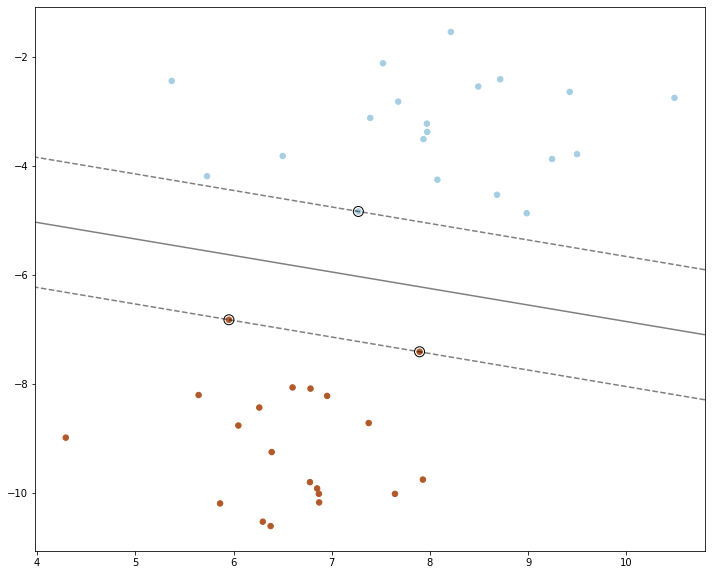

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# create 40 separable points
X,y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
# C : float, default=1.0
# Regularization parameter. The strength of the regularization is 
# inversely proportional to C. Must be strictly positive. 
# The penalty is a squared l2 penalty.
clf = svm.SVC(kernel='linear', C=1000) #hence no regularization
clf.fit(X,y)

plt.figure(figsize=(12,10))

# y is 
# array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 
#        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]) 
# it works as a vector of colors
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
# Get the current Axes instance on the current figure matching 
# the given keyword args, or create one.
ax = plt.gca()
xlim = ax.get_xlim() # -> (xmin, xmax)
ylim = ax.get_ylim()

# create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']
)

# plot the support vector, the contour of the points
ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=100, linewidth=1, facecolors="none",edgecolors='k',
)

plt.show()

In [28]:
Z.shape

(30, 30)

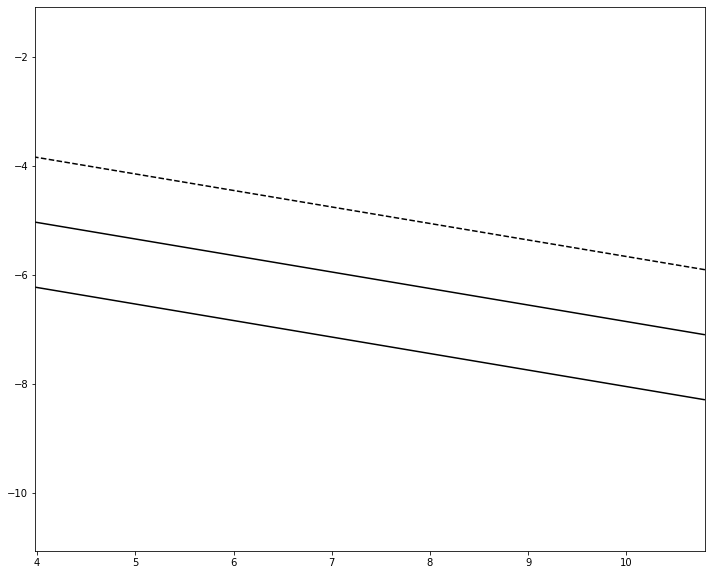

In [78]:
plt.figure(figsize=(12,10))
# plt.contour(
#     XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']
# )
# plt.contour(XX, YY, Z, colors='k', levels=[1])
# plt.contour(XX, YY, Z, colors='k', levels=[0])
# plt.contour(XX, YY, Z, colors='k', levels=[-1])
plt.show()

In [50]:
Z[0]

array([5.05332914, 4.99363837, 4.9339476 , 4.87425683, 4.81456607,
       4.7548753 , 4.69518453, 4.63549376, 4.57580299, 4.51611223,
       4.45642146, 4.39673069, 4.33703992, 4.27734916, 4.21765839,
       4.15796762, 4.09827685, 4.03858608, 3.97889532, 3.91920455,
       3.85951378, 3.79982301, 3.74013224, 3.68044148, 3.62075071,
       3.56105994, 3.50136917, 3.44167841, 3.38198764, 3.32229687])

In [53]:
XX[0]

array([ 3.98244784,  4.21747704,  4.45250625,  4.68753546,  4.92256466,
        5.15759387,  5.39262307,  5.62765228,  5.86268149,  6.09771069,
        6.3327399 ,  6.5677691 ,  6.80279831,  7.03782752,  7.27285672,
        7.50788593,  7.74291513,  7.97794434,  8.21297355,  8.44800275,
        8.68303196,  8.91806116,  9.15309037,  9.38811958,  9.62314878,
        9.85817799, 10.09320719, 10.3282364 , 10.56326561, 10.79829481])

In [55]:
YY[0]

array([-11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196])

In [62]:
print(clf.support_vectors_[:,0])
print(clf.support_vectors_[:,1])

[7.27059007 5.95313618 7.89359985]
[-4.84225716 -6.82945967 -7.41655113]


### Non-linear SVM
Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.

The color map illustrates the decision function learned by the SVC

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_1840/2176359032.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[0], colors='k', linewidth=2, linestyles='dashed')


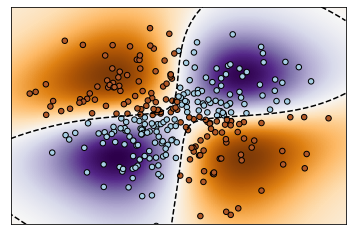

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


xx, yy = np.meshgrid(np.linspace(-3,3,500), np.linspace(-3,3,500))

np.random.seed(0)

#create 300,2 points
X = np.random.randn(300,2) 
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0) #pos-pos/neg-neg -> False, True otherwise

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z, interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect='auto',
    origin='lower',
    cmap=plt.cm.PuOr_r
)
# plot contours
plt.contour(xx,yy,Z, levels=[0], colors='k', linewidth=2, linestyles='dashed')
# plot data points
plt.scatter(X[:,0], X[:,1], s=30, c=Y, edgecolors='k', cmap=plt.cm.Paired)

# remove x_ticks, y_ticks
plt.xticks(())
plt.yticks(())

# xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
plt.axis([-3,3,-3,3])
plt.show()

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_1840/222925084.py:1: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[-2,-1,0,1,2], colors='k', linewidth=2, linestyles='dashed')


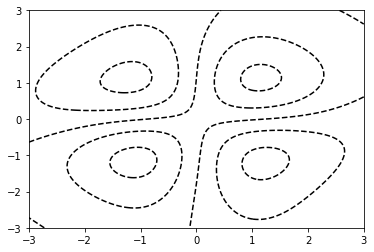

In [105]:
plt.contour(xx,yy,Z, levels=[-2,-1,0,1,2], colors='k', linewidth=2, linestyles='dashed')


In [91]:
Y

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

### SVM-Anova: SVM with univariate feature selection
*Anova: Analysis of Variance*

This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

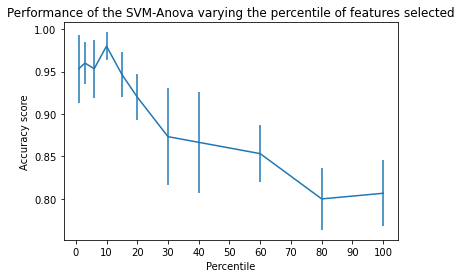

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

np.random.seed(0)
# Import data
X,y = load_iris(return_X_y = True)
# Add non-informative features
X = np.hstack((X, 2*np.random.random((X.shape[0], 36)))) 
# this adds 36 random features X.shape -> (150,40)

# Create a feature-selection transform, a scaler and an instance of SVM 
# that we combine together to have a full-blown estimator
clf = Pipeline(
    [
        ('anova', SelectPercentile(chi2)),
        ('scaler', StandardScaler()),
        ('svc', SVC(gamma='auto')),
    ]
)

# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title('Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0,100,len(percentiles), endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy score')
plt.axis('tight')
plt.show()

In [135]:
max_accuracy_wrt_percentile = percentiles[np.argmax(score_means)]
print(f'We achieve best accuracy with {max_accuracy_wrt_percentile} percentiles')

We achieve best accuracy with 10 percentiles


In [122]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print('a\n',a)
print('b\n',b)
print('hstack\n',np.hstack((a,b)))
print('vstack\n',np.vstack((a,b)))

a
 [1 2 3]
b
 [4 5 6]
hstack
 [1 2 3 4 5 6]
vstack
 [[1 2 3]
 [4 5 6]]


In [121]:
a = np.array([[1],[2],[3]])
b = np.array([[4],[5],[6]])
print('a\n',a)
print('b\n',b)
print('hstack\n',np.hstack((a,b)))
print('vstack\n',np.vstack((a,b)))

a
 [[1]
 [2]
 [3]]
b
 [[4]
 [5]
 [6]]
hstack
 [[1 4]
 [2 5]
 [3 6]]
hstack
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


## Multi-class classification

https://scikit-learn.org/stable/modules/svm.html


SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. In total, `n_classes * (n_classes - 1) / 2` classifiers are constructed and **each one trains data from two classes.** To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape `(n_samples, n_classes)`.


In [139]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0,1,2,3]
clf = svm.SVC(decision_function_shape='ovo') #one-vs-one
clf.fit(X,Y)

dec = clf.decision_function([[1]])
dec.shape[1] #4 classes: 4*3/2 = 6


6

In [140]:
clf.decision_function_shape='ovr' #one-vs-rest
dec.shape[1]

6

Note that the LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option `multi_class='crammer_singer'`. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.

For _“one-vs-rest”_ LinearSVC the attributes `coef_` and `intercept_` have the shape `(n_classes, n_features)` and `(n_classes,)` respectively. Each row of the coefficients corresponds to one of the `n_classes` “one-vs-rest” classifiers and similar for the intercepts, in the order of the “one” class.

In the case of _“one-vs-one”_ SVC and NuSVC, the layout of the attributes is a little more involved. In the case of a linear kernel, the attributes `coef_` and `intercept_` have the shape `(n_classes * (n_classes - 1) / 2, n_features)` and `(n_classes * (n_classes - 1) / 2)` respectively. This is similar to the layout for LinearSVC described above, with each row now corresponding to a binary classifier. The order for classes 0 to n is “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”.

The shape of `dual_coef_` is `(n_classes-1, n_SV)` with a somewhat hard to grasp layout. The columns correspond to the support vectors involved in any of the `n_classes * (n_classes - 1) / 2` “one-vs-one” classifiers. Each of the support vectors is used in `n_classes - 1` classifiers. The `n_classes - 1` entries in each row correspond to the dual coefficients for these classifiers.

Let's see an example:
consider a three class problem with class 0 having three support vectors $v_0^0,v_0^1,v_0^2$ and class 1 and 2 having two support vectors $v_1^0,v_1^1$ and $v_2^0,v_2^1$ respectively. For each support vector $v_i^j$, there are two dual coefficients. Let’s call the coefficient of support vector $v_i^j$ in the classifier between classes $i$ and $k$: $\alpha_{i,k}^j$. Then `dual_coef_` looks like this:

![alt text for screen readers](dual_coef_SVM.png "lol")



### Example: Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:

- `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
- `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.


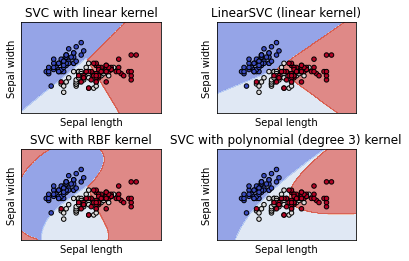

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, step=0.02) -> np.ndarray:
    """create a mesh of points to plot in.

    Args:
        x (list or array): data to base x-axis meshgrid on
        y (list or array): data to base x-axis meshgrid on
        step (float, optional): stepsize for meshgrid. Defaults to 0.02.

    Returns:
        np.ndarray: vectors containing positions
    """
    
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """plot the decision boundaries for a classifier.

    Args:
        ax (matplotlib axes object): axis to plot in
        clf (classifier): classifier used to predict
        xx (np.ndarray): "column positions"
        yy (np.ndarray): "row positions"
        params: dictionary of params to pass to contourf, optional

    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z, **params)
    return out
    

iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
)

models = (clf.fit(X,y) for clf in models)

# title for the plots

titles = (
    "SVC with linear kernel", "LinearSVC (linear kernel)", "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# set-up 2x2 grid for plotting
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

In [9]:
make_meshgrid(np.arange(0,5,1), np.arange(2,7,1))[1]

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [6.94, 6.94, 6.94, ..., 6.94, 6.94, 6.94],
       [6.96, 6.96, 6.96, ..., 6.96, 6.96, 6.96],
       [6.98, 6.98, 6.98, ..., 6.98, 6.98, 6.98]])

In [6]:
np.arange(0,5,1)

array([0, 1, 2, 3, 4])

In [8]:
np.arange(2,7,1)

array([2, 3, 4, 5, 6])

## Unbalanced problems
In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters `class_weight` and `sample_weight` can be used.

SVC (but **not NuSVC**) implements the parameter `class_weight` in the fit method. It’s a **dictionary** of the form `{class_label : value}`, where value is a floating point number > 0 that sets the parameter `C` of class `class_label` to `C * value`. The figure in the example _SVM: Separating hyperplane for unbalanced classes_ illustrates the decision boundary of an unbalanced problem, with and without weight correction.

SVC, NuSVC, SVR, NuSVR, LinearSVC, LinearSVR and OneClassSVM implement also weights for individual samples in the `fit` method through the `sample_weight` parameter. Similar to `class_weight`, this sets the parameter `C` for the i-th example to `C * sample_weight[i]`, which will encourage the classifier to get these samples right. The figure of _SVM: Weighted samples_ illustrates the effect of sample weighting on the decision boundary. The size of the circles is proportional to the sample weights.

### Example - SVM: Separating hyperplane for unbalanced classes

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

**Note:** This example will also work by replacing `SVC(kernel="linear")` with `SGDClassifier(loss="hinge")`. **Setting the loss parameter of the SGDClassifier equal to hinge will yield behaviour such as that of a SVC with a linear kernel.**
For example try instead of the SVC: `clf = SGDClassifier(n_iter=100, alpha=0.01)`

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_2827/386704381.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  a = ax.contour(XX, YY, Z, colors='g', levels=[0], alpha=0.8, linestyles=["-."], label='not weighted')
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_2827/386704381.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  b = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8, linestyles=["-"], label='weighted')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


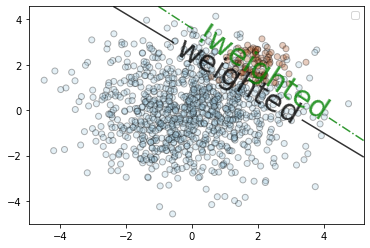

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# create 2 clusters of random points
n_samples_1 = 1000
n_samples_2 = 100

centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
X,y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,   
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X,y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={0:1, 1:10})
wclf.fit(X,y)

# plot the samples
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k', alpha=.3)

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create the grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(xx, yy)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot the decision boundary and margins
a = ax.contour(XX, YY, Z, colors='g', levels=[0], alpha=0.8, linestyles=["-."], label='not weighted')

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot the decision boundary and margins
b = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8, linestyles=["-"], label='weighted')

def fmt_b(x):
    return "weighted"
def fmt_a(x):
    return "!weighted"

ax.clabel(b, b.levels, fmt=fmt_b, inline=True, fontsize=3*10)
ax.clabel(a, a.levels, fmt=fmt_a, inline=True, fontsize=3*10)
plt.legend()

plt.show()

In [27]:
a.collections[0]

In [11]:
XX[0]

array([-4.95433836, -4.60353769, -4.25273701, -3.90193634, -3.55113566,
       -3.20033498, -2.84953431, -2.49873363, -2.14793296, -1.79713228,
       -1.44633161, -1.09553093, -0.74473025, -0.39392958, -0.0431289 ,
        0.30767177,  0.65847245,  1.00927312,  1.3600738 ,  1.71087448,
        2.06167515,  2.41247583,  2.7632765 ,  3.11407718,  3.46487785,
        3.81567853,  4.16647921,  4.51727988,  4.86808056,  5.21888123])

In [12]:
YY[0]

array([-5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
       -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
       -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
       -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
       -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
       -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694])

In [13]:
np.vstack([XX[0],YY[0]])

array([[-4.95433836, -4.60353769, -4.25273701, -3.90193634, -3.55113566,
        -3.20033498, -2.84953431, -2.49873363, -2.14793296, -1.79713228,
        -1.44633161, -1.09553093, -0.74473025, -0.39392958, -0.0431289 ,
         0.30767177,  0.65847245,  1.00927312,  1.3600738 ,  1.71087448,
         2.06167515,  2.41247583,  2.7632765 ,  3.11407718,  3.46487785,
         3.81567853,  4.16647921,  4.51727988,  4.86808056,  5.21888123],
       [-5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
        -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
        -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
        -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
        -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694,
        -5.00462694, -5.00462694, -5.00462694, -5.00462694, -5.00462694]])

### Example - SVM: Weighted samples

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

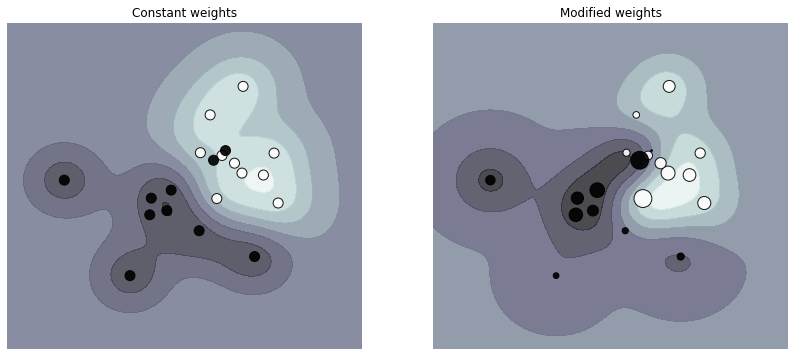

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4,5,500), np.linspace(-4,5,500))
    
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:,0], X[:,1],
        c=y,
        s=100*sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors='black'
    )
    
    axis.axis('off')
    axis.set_title(title)
    
# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10,2) + [1,1], np.random.randn(10,2)]
y = [1]*10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))

# add bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X,y,sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)    

fig, axes = plt.subplots(1,2, figsize=(14,6))
plot_decision_function(
    clf_no_weights, sample_weight=sample_weight_constant, 
    axis=axes[0], title='Constant weights',
)

plot_decision_function(clf_weights, sample_weight=sample_weight_last_ten, 
                       axis=axes[1], title='Modified weights')

plt.show()

In [61]:
print(len(X))
X.shape

20


(20, 2)

In [59]:
X

array([[ 2.76405235,  1.40015721],
       [ 1.97873798,  3.2408932 ],
       [ 2.86755799,  0.02272212],
       [ 1.95008842,  0.84864279],
       [ 0.89678115,  1.4105985 ],
       [ 1.14404357,  2.45427351],
       [ 1.76103773,  1.12167502],
       [ 1.44386323,  1.33367433],
       [ 2.49407907,  0.79484174],
       [ 1.3130677 ,  0.14590426],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275]])

In [76]:
a = np.random.randn(10,2) + [1,1]
print(a.max())
b = np.random.randn(10,2)
print(b.max())

2.4883829370954853
0.9410308109846885


In [77]:
np.random.randn(len(X))

array([ 0.36846691, -0.09743004,  0.6388735 ,  1.06138668, -0.77358677,
       -0.69601544, -0.41235644, -1.81030697,  1.5308268 , -0.03325109,
       -0.07198204,  0.06865298,  1.1655696 , -0.24849596, -0.47948293,
       -0.84145667, -0.13434625, -0.75724967,  0.1633898 , -0.93980543])

## Regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details)  for further details.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

In [79]:
from sklearn import svm
X = [[0,0], [2,2]]
y = [0.5,2.5]
regr = svm.SVR().fit(X,y)
regr.predict([[1,1]])

array([1.5])

### Example - Support Vector Regression (SVR) using linear and non-linear kernels
Toy example of 1D regression using linear, polynomial and RBF kernels.

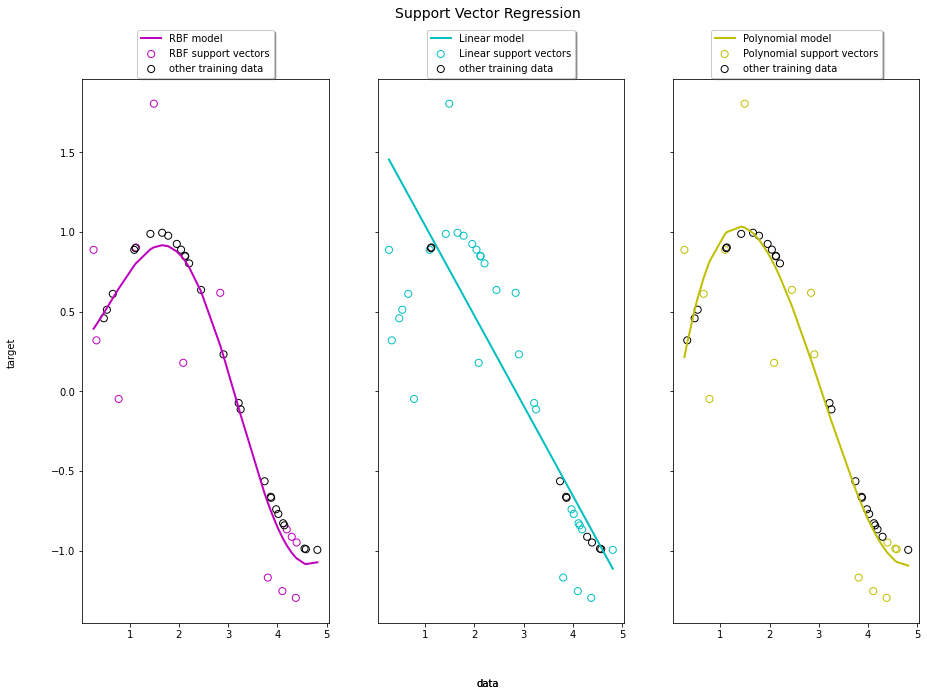

In [20]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# generate sample data
num_points = 40
const = 2*np.pi
const = 5
X = np.sort(const*np.random.rand(num_points,1), axis=0)
y = np.sin(X).ravel() #ravel to make it flat

# add noise to targets
step = 5
num_noise_points = len(X)//step
y[::step] += 3*(0.5 - np.random.rand(num_noise_points))

# fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', degree=3, C=100, gamma='auto', epsilon=0.1, coef0=1)

# look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'y']

fig, axes = plt.subplots(1, 3, figsize=(15,10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X, svr.fit(X,y).predict(X),
        color = model_color[ix],
        lw=lw,
        label=f'{kernel_label[ix]} model'
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor='none', # don't fill the points
        edgecolor=model_color[ix],
        s=50, label =f'{kernel_label[ix]} support vectors'
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor='none',
        edgecolor='k', s=50, label='other training data',
    )
    axes[ix].legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.1), # 1 is the top, with 1.1 you go higher than the top
        ncol=1,
        fancybox=True,
        shadow=True
    )
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [21]:
svr_lin.support_

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 25, 28, 29, 30, 31, 32, 33, 35, 39],
      dtype=int32)

In [22]:
np.arange(len(X))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [24]:
np.setdiff1d(np.arange(len(X)), svr_lin.support_) # points that lack

array([ 7,  8, 24, 26, 27, 34, 36, 37, 38])

In [25]:
X[np.setdiff1d(np.arange(len(X)), svr_lin.support_)] # points that will be plot

array([[1.11817613],
       [1.12855109],
       [3.74103152],
       [3.86487459],
       [3.87324343],
       [4.29151749],
       [4.39075533],
       [4.55246222],
       [4.57800221]])

## Tips on Practical Use

- **Avoiding data copy:** For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its `flags` attribute.

    For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input, we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.

- **Kernel cache size:** For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

- **Setting C:** C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

    LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

- Support Vector Machine algorithms are _not scale invariant_, so **it is highly recommended to scale your data!** For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be done easily by using a `Pipeline`:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

See section [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) for more details on scaling and normalization.

- Regarding the shrinking parameter, quoting [12](https://scikit-learn.org/stable/modules/svm.html#id14): _We found that if the number of iterations is large, then shrinking can shorten the training time. However, if we loosely solve the optimization problem (e.g., by using a large stopping tolerance), the code without using shrinking may be much faster_

- Parameter `nu` in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

- In **SVC**, if the **data** is **unbalanced** (e.g. many positive and few negative), set `class_weight='balanced'` and/or try different penalty parameters C.

- **Randomness of the underlying implementations:** The underlying implementations of SVC and NuSVC use a random number generator only to shuffle the data for probability estimation (when probability is set to `True`). This randomness can be controlled with the `random_state` parameter. If probability is set to `False` these estimators are not random and `random_state` has no effect on the results. The underlying OneClassSVM implementation is similar to the ones of SVC and NuSVC. As no probability estimation is provided for OneClassSVM, it is not random.

    The underlying LinearSVC implementation uses a random number generator to select features when fitting the model with a dual coordinate descent (i.e when `dual` is set to `True`). It is thus not uncommon to have slightly different results for the same input data. If that happens, try with a smaller `tol` parameter. This randomness can also be controlled with the `random_state` parameter. When `dual` is set to `False` the underlying implementation of LinearSVC is not random and `random_state` has no effect on the results.

- Using L1 penalization as provided by `LinearSVC(penalty='l1', dual=False)` yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing `C` yields a more complex model (more features are selected). The `C` value that yields a “null” model (all weights equal to zero) can be calculated using l1_min_c.


## Kernel functions

The _kernel function_ can be any of the following:
- linear: $\langle x, x'\rangle$. (This is the inner product, generalization of the dot product to abstract vector spaces over a field of scalars)
- polynomial: $(\gamma\langle x, x'\rangle + r)^d$ where $d$ is specified by parameter `degree`, $r$ by `coef0` (where the graph intercepts the y axis).
- rbf: $\exp(-\gamma||x-x'||^2)$, where $\gamma$ is specified by parameter `gamma`, must be greater than 0.
- sigmoid: $\tanh(\gamma\langle x, x'\rangle + r)$, where $r$ is specified by `coef0`.

Different kernels are specified by the `kernel` parameter: 

In [2]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [3]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

### Parameters of the RBF Kernel

When training an SVM with the _Radial Basis Function_ (RBF) kernel, **two parameters** must be considered: `C` and `gamma`. The parameter `C`, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. **A low `C` makes the decision surface smooth, while a high `C` aims at classifying all training examples correctly.** `gamma` defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. **One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.**

### Example - RBF SVM parameters
This example illustrates the effect of the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM.

Intuitively, the `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The `gamma` parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The `C` parameter trades off correct classification of training examples against maximization of the decision function’s margin. **For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.** In other words C behaves as a regularization parameter in the SVM.

The first plot is a visualization of the decision function for a variety of parameter values on a simplified classification problem involving only 2 input features and 2 possible target classes (binary classification). Note that this kind of plot is not possible to do for problems with more features or target classes.

The second plot is a heatmap of the classifier’s cross-validation accuracy as a function of C and gamma. For this example we explore a relatively large grid for illustration purposes. In practice, a logarithmic grid from $10^{−3}$ to $10^3$ is usually sufficient. If the best parameters lie on the boundaries of the grid, it can be extended in that direction in a subsequent search.

Note that the heat map plot has a special colorbar with a midpoint value close to the score values of the best performing models so as to make it easy to tell them apart in the blink of an eye.

*The behavior of the model is very sensitive to the gamma parameter.* If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by increasing the importance of classifying each point correctly (larger C values) hence the diagonal of good performing models.

Finally, one can also observe that for some intermediate values of gamma we get equally performing models when C becomes very large. This suggests that the set of support vectors does not change anymore. The radius of the RBF kernel alone acts as a good structural regularizer. Increasing C further doesn’t help, likely because there are no more training points in violation (inside the margin or wrongly classified), or at least no better solution can be found. **Scores being equal, it may make sense to use the smaller C values, since very high C values typically increase fitting time.**

**On the other hand, lower C values generally lead to more support vectors, which may increase prediction time. Therefore, lowering the value of C involves a trade-off between fitting time and prediction time.**

We should also note that small differences in scores results from the random splits of the cross-validation procedure. Those spurious variations can be smoothed out by increasing the number of CV (cross validation) iterations n_splits at the expense of compute time. Increasing the value number of `C_range` and `gamma_range` steps will increase the resolution of the hyper-parameter heat map.

The best parameters are {'C': 1000000000.0, 'gamma': 1e-07} with a score of 0.99


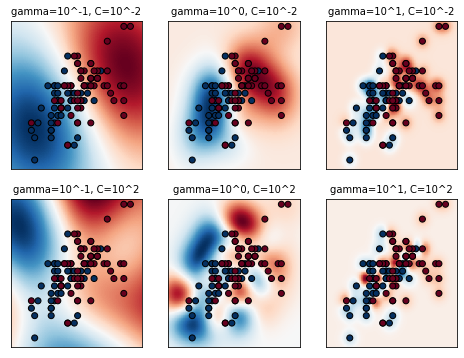

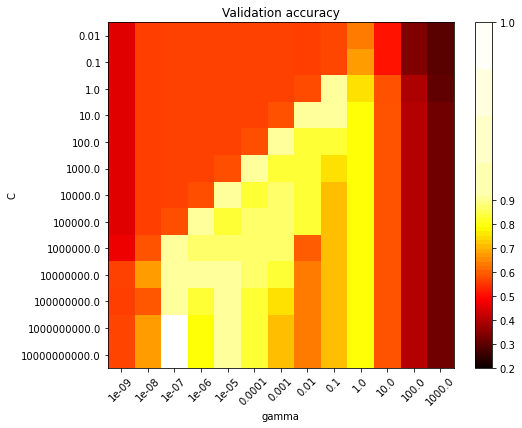

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint=midpoint
        Normalize.__init__(self, vmin, vmax, clip)
        
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0,0.5,1]
        return np.ma.masked_array(np.interp(value, x, y))
    
# #############################################################################
# Load and prepare data set
#
# dataset for grid search


iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2] #2 features
X_2d = X_2d[y > 0] #2 classes
y_2d = y[y > 0]
y_2d -= 1 # to classify as 0 or 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13) #13 values returned
gamma_range = np.logspace(-9, 3, 13) #13 values returned
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf)) 

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8,6))
xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size='medium')
    
    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

# normalizza rispetto al valore minimo di accuracy, altrimenti sarebbero tutti 
# valori molto vicini tra loro e l'output sarebbe sempre bianco

plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation='nearest',
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92)
)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()